# cifar100 데이터셋 학습 (to do)

CIFAR-100 데이터셋은 총 100개의 label로 이루어진 이미지 분류를 위한 데이터셋이다.

각각의 레이블마다 32×32 크기 이미지인 50,000개의 training 데이터셋, 10,000개의 test 데이터셋이 존재하고, 결과적으로 총 60,000개의 32×32 크기의 이미지로 데이터셋이 구성되어 있다.

## (1) 데이터셋 준비

In [1]:
import keras
from keras.utils import np_utils, print_summary, to_categorical
from keras import datasets
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras.layers import Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

import tensorflow as tf 
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar100.load_data()
print(X_train.shape, Y_train.shape)

(50000, 32, 32, 3) (50000, 1)


label :  [19]


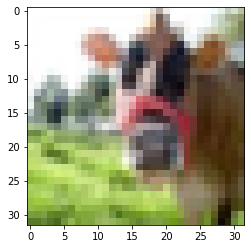

In [3]:
print('label : ',Y_train[0])
plt.imshow(X_train[0])

In [4]:
from keras import backend
backend.image_data_format()

'channels_last'

In [5]:
# X_train.shape

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)

X_train = X_train/255.0
X_test = X_test/255.0

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

print(X_train.shape, Y_train.shape)

n_in = X_train.shape[1:]
n_out = Y_train.shape[-1]
n_out

(50000, 32, 32, 3) (50000, 100)


100

## (2) 모델링

In [6]:
from keras.layers import Flatten, BatchNormalization, Dropout, ReLU
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [22]:
def CNN(n_in, n_out):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=n_in))
    model.add(Conv2D(32, (3, 3), padding='same',strides=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(n_out, activation='softmax'))
    return model

def CNN_BN(n_in, n_out):

    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=n_in))
    model.add(ReLU())
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(ReLU())
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(ReLU())
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(ReLU())
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(ReLU())
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(ReLU())
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(n_out, activation='softmax'))

    return model

In [23]:
model= CNN_BN(n_in, n_out)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
re_lu_8 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)       

## (3) 모델의 학습과정 설정

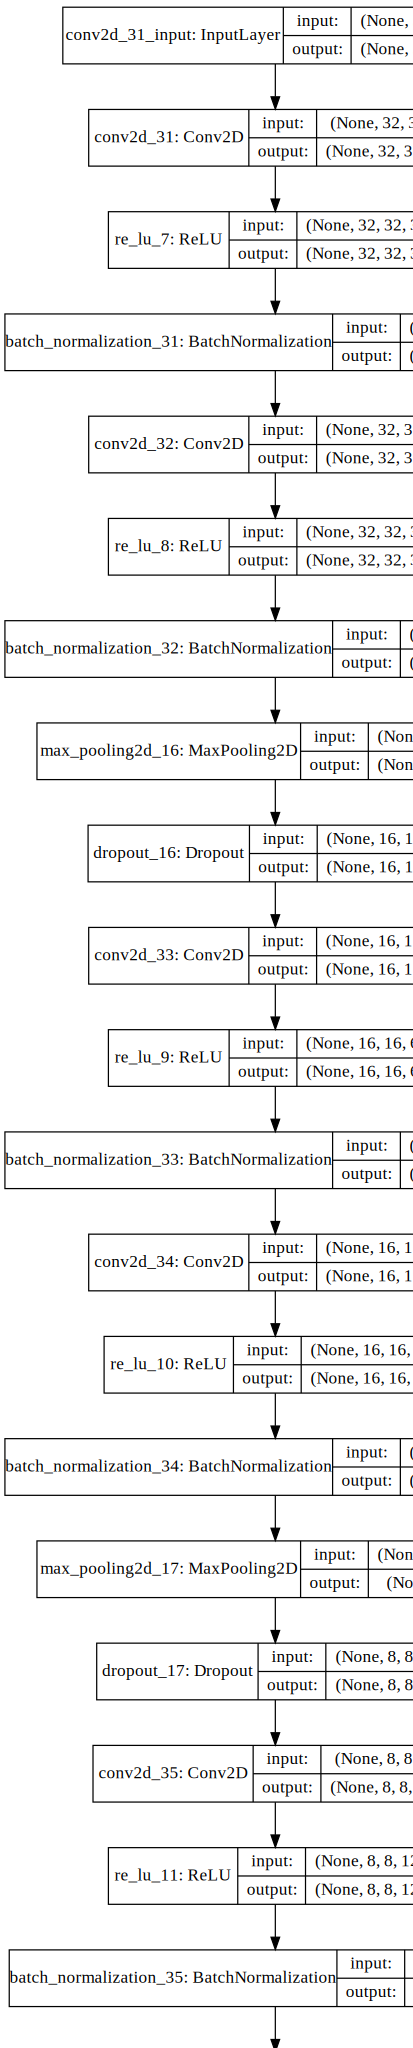

In [24]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [25]:
from keras.optimizers import Adam

In [26]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=1e-6, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

## (4) 모델 학습시키기

In [32]:
# %load_ext tensorboard
# import datetime
# !rm -rm./logs/
# losg_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbalcks.Tensorboard(log_dir =log_dir, histogram_freq=1)
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_split=0.2) # real epochs = 15 

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 235s 6ms/step - loss: 1.5889 - accuracy: 0.5604 - val_loss: 2.0374 - val_accuracy: 0.4832
Epoch 2/5
40000/40000 [==============================] - 219s 5ms/step - loss: 1.4931 - accuracy: 0.5826 - val_loss: 2.0107 - val_accuracy: 0.4866
Epoch 3/5
40000/40000 [==============================] - 220s 6ms/step - loss: 1.4243 - accuracy: 0.5991 - val_loss: 2.0428 - val_accuracy: 0.4858
Epoch 4/5
40000/40000 [==============================] - 216s 5ms/step - loss: 1.3464 - accuracy: 0.6173 - val_loss: 1.9409 - val_accuracy: 0.5123
Epoch 5/5
40000/40000 [==============================] - 218s 5ms/step - loss: 1.2854 - accuracy: 0.6298 - val_loss: 1.8915 - val_accuracy: 0.5152


## (5) 모델 평가하기

In [33]:
loss_and_accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))



10000/10000 [==============================] - 18s 2ms/step
loss : 1.8488, accruracy : 0.5233


## (6) 모델 사용하기

predict label :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


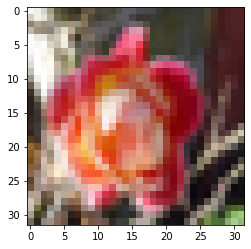

In [34]:

test_data = X_test[-1].reshape(1,32,32,3)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('predict label : ',Y_test[-1])
plt.imshow(X_test[-1].reshape(32,32,3), cmap='gray')